In [1]:
import keras.models

Using TensorFlow backend.


In [2]:
import os
import bregnn.io as io

base_dir = os.environ['SCRATCH'] + '/bregression'

data = io.read_data(base_dir+'/ttbar_unweighted_full80M_selected_test.hd5', columns = None )

In [275]:
target = 'hybrid_cfg'
models = !ls -t $target/*.hdf5
models

['hybrid_cfg/model-19.hdf5',
 'hybrid_cfg/model-13.hdf5',
 'hybrid_cfg/model-07.hdf5',
 'hybrid_cfg/model-04.hdf5',
 'hybrid_cfg/model-03.hdf5',
 'hybrid_cfg/model-02.hdf5',
 'hybrid_cfg/model-01.hdf5']

In [276]:
import json
with open('%s/config.json' % target) as fin:
    config = json.loads(fin.read())
config

{'fit_kwargs': {'batch_size': 1024, 'epochs': 20},
 'model_params': {'activations': ['lrelu',
   'lrelu',
   'lrelu',
   'lrelu',
   'lrelu',
   'lrelu',
   'lrelu',
   'lrelu'],
  'batch_norm': True,
  'const_output_biases': None,
  'do_bn0': True,
  'dropout': 0.2,
  'input_shape': [35],
  'layers': [1024, 1024, 1024, 1024, 1024, 512, 256, 128],
  'loss': 'HybridLoss',
  'loss_params': {},
  'monitor_dir': 'hybrid_cfg',
  'name': 'ffwd',
  'non_neg': False,
  'optimizer': 'Adam',
  'optimizer_params': {'lr': 0.001},
  'output_shape': None,
  'save_best_only': True,
  'valid_frac': 0.05},
 'options': {'batch_size': 1024,
  'epochs': 20,
  'features': 'Jet_pt,Jet_eta,rho,Jet_mt,Jet_leadTrackPt,Jet_leptonPtRel,Jet_leptonDeltaR,Jet_neHEF,Jet_neEmEF,Jet_vtxPt,Jet_vtxMass,Jet_vtx3dL,Jet_vtxNtrk,Jet_vtx3deL,Jet_energyRing_dR0_em_Jet_e,Jet_energyRing_dR1_em_Jet_e,Jet_energyRing_dR2_em_Jet_e,Jet_energyRing_dR3_em_Jet_e,Jet_energyRing_dR4_em_Jet_e,Jet_energyRing_dR0_neut_Jet_e,Jet_energyRing_d

In [277]:
features = config['options']['features'].split(',')

X = data[features].values
y = (data['Jet_mcPt']/data['Jet_pt']).values.reshape(-1,1)

# y_mean = np.median(y)#.mean()
# y_std = y.std()

# print(y_mean,y_std)


In [278]:
y -= config['y_mean']
y /= config['y_std']

In [279]:
model = keras.models.load_model(models[0],compile=False)

In [280]:
y_pred = model.predict(X)

In [281]:
if y_pred.shape[1] == 1:
    corr = y_pred
    res = None
elif y_pred.shape[1] == 2:
    corr = y_pred[:,0]
    res = y_pred[:,1]
elif y_pred.shape[1] == 3:
    corr = y_pred[:,0]
    res = 0.5*(y_pred[:,2] - y_pred[:,1])
    
        

In [282]:
if y_pred.shape[1] > 1:
    err = y[:,0]-corr
else:
    err = y-corr

In [283]:
print(y.mean(),y.std())

0.201281 0.989673


In [284]:
me = err.mean()
std = err.std()
mse = np.square(err).mean()
mae = np.abs(err).mean()
print('test me ', me, ' std ', std, ' mse ', mse, ' mae ', mae)

test me  0.0756178  std  0.739546  mse  0.552647  mae  0.350795


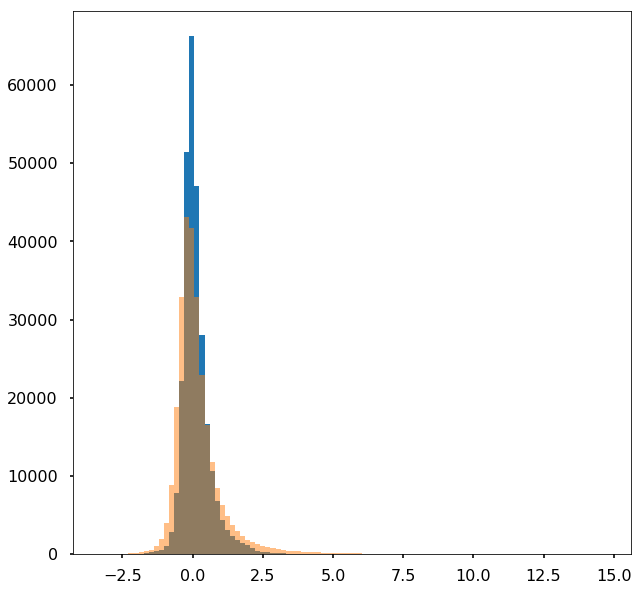

In [285]:
_,bins,_ = plt.hist(y_pred[:,0],bins=100);
plt.hist(y[:,0],bins=bins,alpha=0.5);

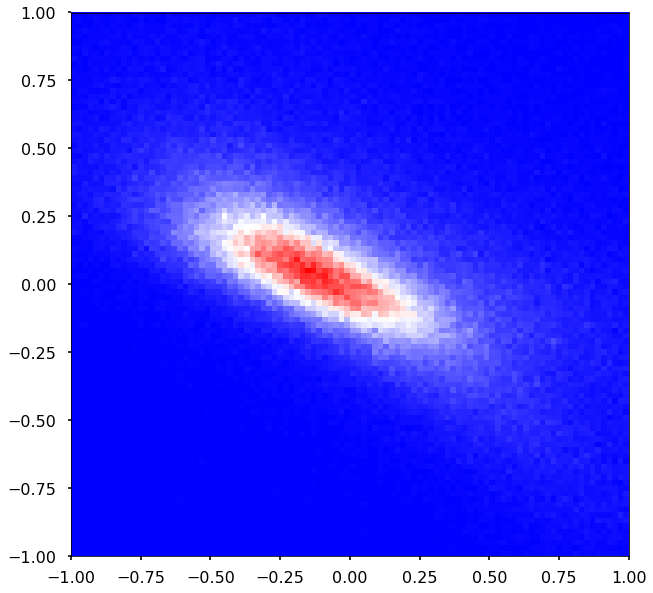

In [266]:
plt.hist2d(y.ravel(),corr.ravel()-y.ravel(),bins=100,range=[[-1,1],[-1,1]]);

In [485]:
y [ (X[:,0] > 100 ) & (X[:,0] < 200.) ].mean()

-0.011010674

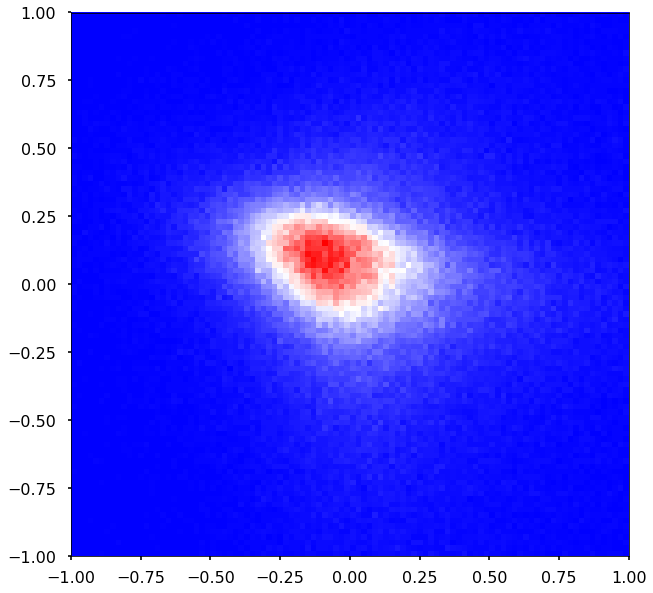

In [486]:
plt.hist2d(corr.ravel(),corr.ravel()-y.ravel(),bins=100,range=[[-1,1],[-1,1]]);

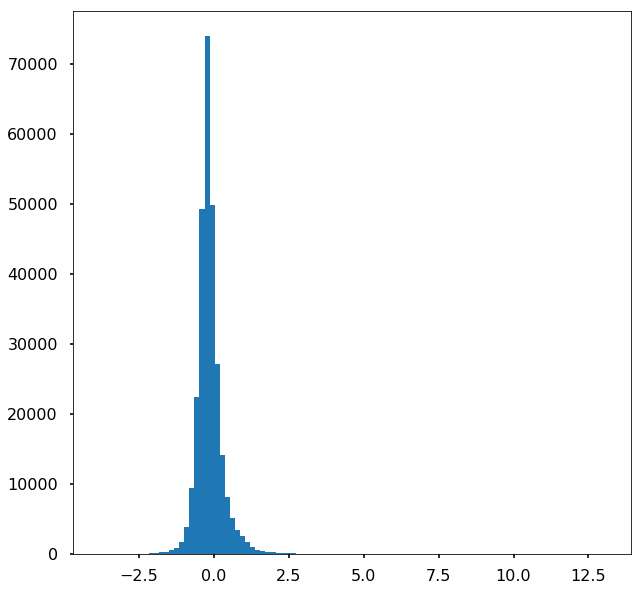

In [487]:
if y_pred.shape[1] > 1:
    plt.hist(y_pred[:,1],bins=100);

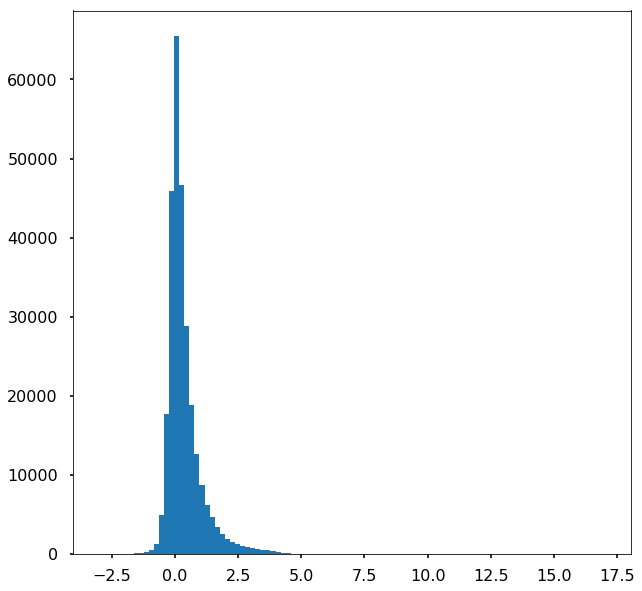

In [488]:
if y_pred.shape[1] > 2:
    plt.hist(y_pred[:,2],bins=100);

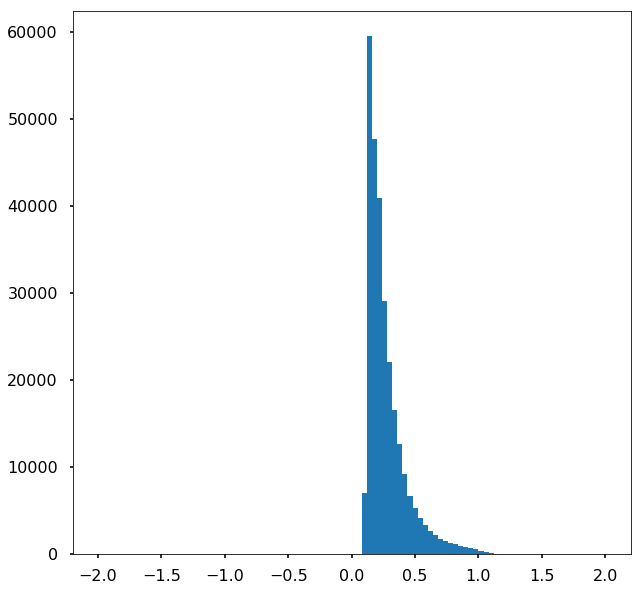

In [489]:
if y_pred.shape[1] > 2:
    plt.hist(y_pred[:,0]-y_pred[:,1],bins=100,range=[-2,2]);

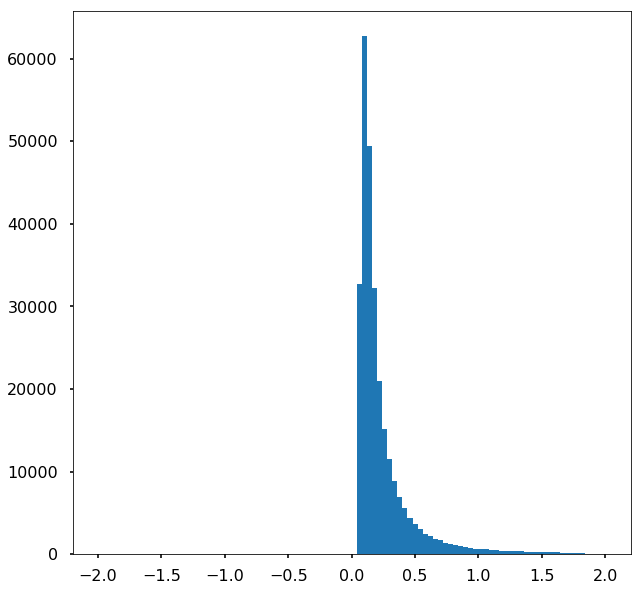

In [490]:
if y_pred.shape[1] > 2:
    plt.hist(y_pred[:,2]-y_pred[:,0],bins=100,range=[-2,2]);

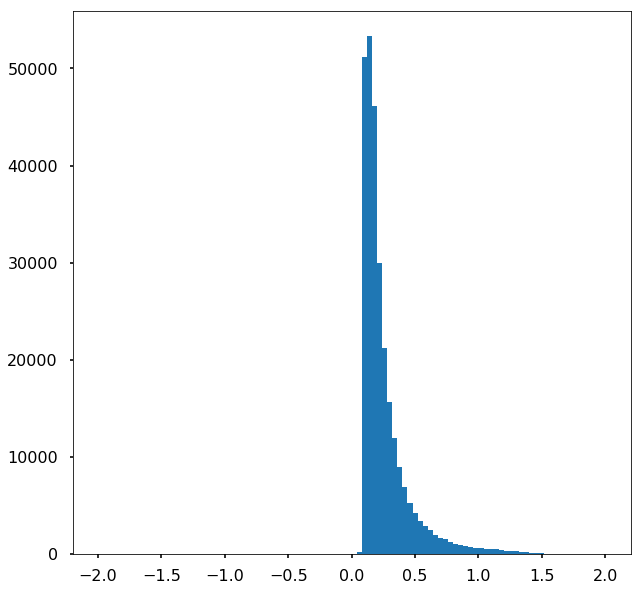

In [491]:
if res is not None:
    plt.hist(res,bins=100,range=[-2,2]);

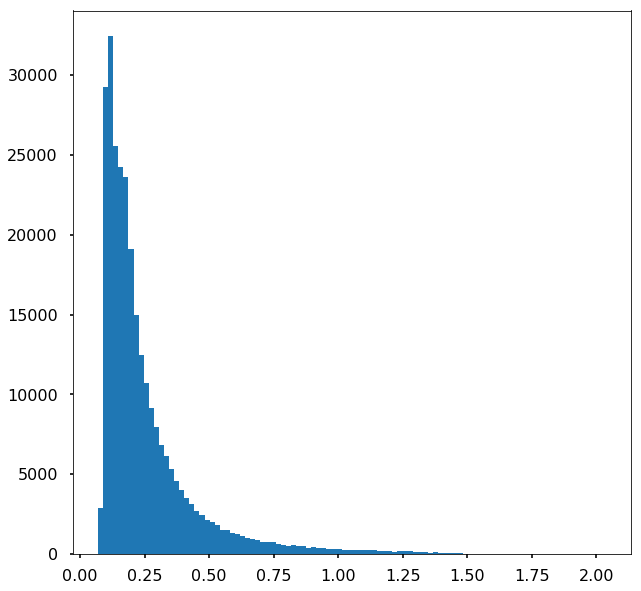

In [492]:
if res is not None:
    plt.hist(res.ravel(),bins=100)

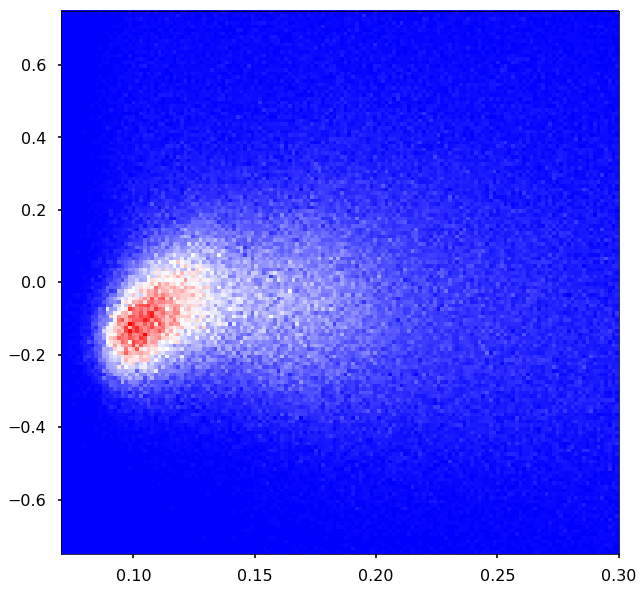

In [493]:
if res is not None:
    plt.hist2d(res.ravel(),y.ravel()-corr.ravel(),bins=150,range=[[0.07,0.3],[-0.75,0.75]]);

In [289]:
import bregnn.utils as utils

In [470]:
reload(utils)

bins, y_mean_pt, y_std_pt, y_qt_pt = utils.profile(y,X[:,0],range=[30,200],bins=100,uniform=False)
y_median_pt = y_qt_pt[1]
y_iqr2_pt =  y_qt_pt[0],y_qt_pt[2]

_, err_mean_pt, err_std_pt, err_qt_pt = utils.profile(err,X[:,0],bins=bins) 
err_median_pt = err_qt_pt[1]
err_iqr2_pt =  err_qt_pt[0],err_qt_pt[2]


(101,)
100
(101,)
100


In [471]:
print(err_qt_pt.shape)

(3, 100)


In [472]:
# bins, mean, std, quantiles = pt_profile
# print(quantiles.shape)

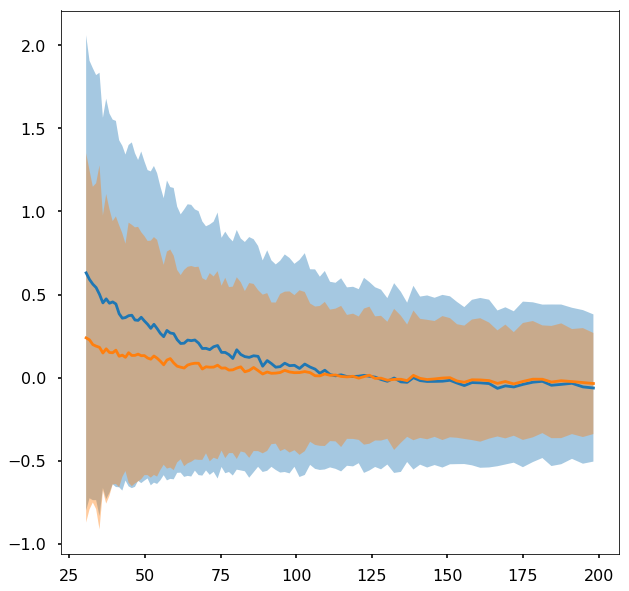

In [473]:
binc = 0.5*(bins[1:]+bins[:-1])

plt.plot(binc,y_mean_pt)
plt.fill_between(binc,y_mean_pt-y_std_pt,y_mean_pt+y_std_pt,alpha=0.4)

plt.plot(binc,err_mean_pt)
plt.fill_between(binc,err_mean_pt-err_std_pt,err_mean_pt+err_std_pt,alpha=0.4)

# plt.plot(0.5*(bins[1:]+bins[:-1]),quantiles[:,0])


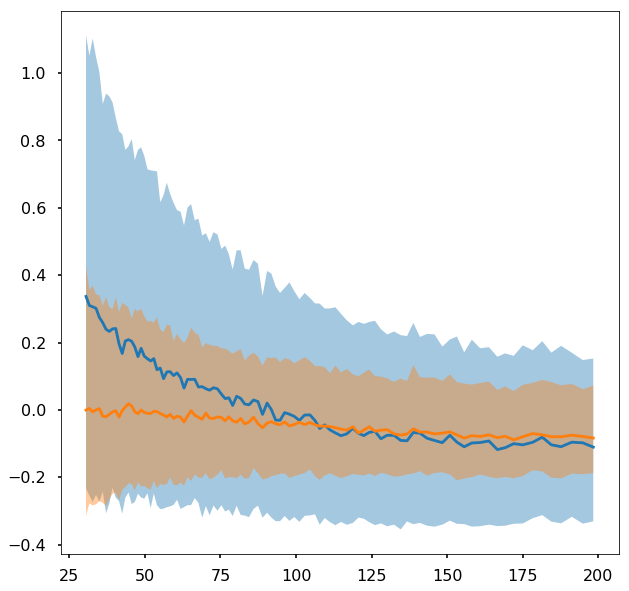

In [474]:
plt.plot(binc,y_median_pt)
plt.fill_between(binc,*y_iqr2_pt,alpha=0.4)

#print(err_median_pt)
plt.plot(binc,err_median_pt)
plt.fill_between(binc,*err_iqr2_pt,alpha=0.4)

#plt.plot(binc,err_mean_pt)
#plt.fill_between(binc,err_mean_pt-err_std_pt,err_mean_pt+err_std_pt,alpha=0.4)

# plt.plot(0.5*(bins[1:]+bins[:-1]),quantiles[:,0])


In [483]:
if res is not None:
    res_bins, err_qt_res = utils.profile(err,res,bins=30,range=[0,0.5],moments=False) 
    print(err_qt_res.shape)
    err_iqr2 =  0.5*(err_qt_res[2]-err_qt_res[0])


(31,)
30
(3, 30)


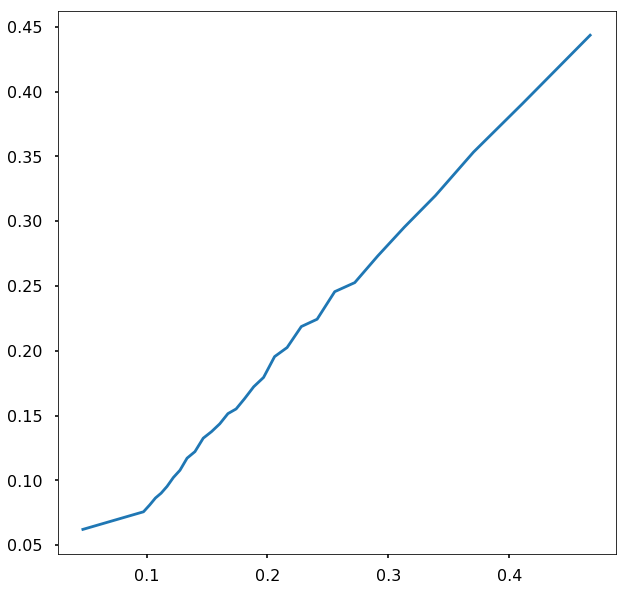

In [484]:
if res is not None:
    plt.plot(0.5*(res_bins[1:]+res_bins[:-1]),err_iqr2)